<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/Starbucks_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 스타벅스 음료 열량, 첨가물 용량 등
- 데이터 출처 : https://www.kaggle.com/datasets/henryshan/starbucks/data

### 사전 설정

In [1]:
colab = True

In [2]:
from google.colab import drive

if colab == True :
  drive.mount('/content/drive')
else:
  pass

Mounted at /content/drive


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and direc

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

### 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = './drive/MyDrive/응용/kaggle/Starbucks/starbucks.csv'
df = pd.read_csv(path)

컬럼 의미


- 'Beverage_category' : 음료의 종료
- 'Beverage' : 음료의 구체적인 이름을 제공
- 'Beverage_prep' : 음료의 제조 방법을 자세히 설명
- 'Calories' : 칼로리
- 'Total Fat (g)' : 총 지방
- 'Trans Fat (g)' : 트랜스지방
- 'Saturated Fat (g)' : 포화지방
- 'Sodium (mg)' : 나트륨
- 'Total Carbohydrates (g)' : 총 탄수화물
- 'Cholesterol (mg)' : 콜레스테롤
- 'Dietary Fibre (g)' : 식이섬유
- 'Sugars (g)' : 설탕
- 'Protein (g)' : 단백질
- 'Vitamin A (% DV)' : 비타민A
- 'Vitamin C (% DV)' : 비타민C
- 'Calcium (% DV)' : 칼슘
- 'Iron (% DV)' : 철
- 'Caffeine (mg)' : 카페인

In [4]:
df.head(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330


In [5]:
df.shape

(242, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [7]:
# 컬럼명에 공백 제거
col = df.columns.tolist()
col[:5]

['Beverage_category',
 'Beverage',
 'Beverage_prep',
 'Calories',
 ' Total Fat (g)']

In [8]:
new_col = []
for _ in col:
  new_col.append(_.split('(')[0].strip().replace(' ', '_'))

In [9]:
new_col

['Beverage_category',
 'Beverage',
 'Beverage_prep',
 'Calories',
 'Total_Fat',
 'Trans_Fat',
 'Saturated_Fat',
 'Sodium',
 'Total_Carbohydrates',
 'Cholesterol',
 'Dietary_Fibre',
 'Sugars',
 'Protein',
 'Vitamin_A',
 'Vitamin_C',
 'Calcium',
 'Iron',
 'Caffeine']

In [10]:
# 컬럼명 변경
df.columns = new_col

In [11]:
df.head(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbohydrates,Cholesterol,Dietary_Fibre,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium,Iron,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330


In [12]:
# NaN값 확인
df[df['Caffeine'].isna()]

,Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbohydrates,Cholesterol,Dietary_Fibre,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium,Iron,Caffeine
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [13]:
# NaN값 채우기
# 근거 사이트 : https://www.starbucks.com/menu/product/2123425/iced/nutrition
df['Caffeine'].fillna('225', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Beverage_category    242 non-null    object 
 1   Beverage             242 non-null    object 
 2   Beverage_prep        242 non-null    object 
 3   Calories             242 non-null    int64  
 4   Total_Fat            242 non-null    object 
 5   Trans_Fat            242 non-null    float64
 6   Saturated_Fat        242 non-null    float64
 7   Sodium               242 non-null    int64  
 8   Total_Carbohydrates  242 non-null    int64  
 9   Cholesterol          242 non-null    int64  
 10  Dietary_Fibre        242 non-null    int64  
 11  Sugars               242 non-null    int64  
 12  Protein              242 non-null    float64
 13  Vitamin_A            242 non-null    object 
 14  Vitamin_C            242 non-null    object 
 15  Calcium              242 non-null    obj

In [15]:
df.head(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbohydrates,Cholesterol,Dietary_Fibre,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium,Iron,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330


In [16]:
# 타입 변경
df['Vitamin_A'] = df['Vitamin_A'].str.replace('%', '')
df['Vitamin_A'] = df['Vitamin_A'].astype('int64')

df['Vitamin_C'] = df['Vitamin_C'].str.replace('%', '')
df['Vitamin_C'] = df['Vitamin_C'].astype('int64')

df['Calcium'] = df['Calcium'].str.replace('%', '')
df['Calcium'] = df['Calcium'].astype('int64')

df['Iron'] = df['Iron'].str.replace('%', '')
df['Iron'] = df['Iron'].astype('float64')
df['Iron'] = df['Iron'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Beverage_category    242 non-null    object 
 1   Beverage             242 non-null    object 
 2   Beverage_prep        242 non-null    object 
 3   Calories             242 non-null    int64  
 4   Total_Fat            242 non-null    object 
 5   Trans_Fat            242 non-null    float64
 6   Saturated_Fat        242 non-null    float64
 7   Sodium               242 non-null    int64  
 8   Total_Carbohydrates  242 non-null    int64  
 9   Cholesterol          242 non-null    int64  
 10  Dietary_Fibre        242 non-null    int64  
 11  Sugars               242 non-null    int64  
 12  Protein              242 non-null    float64
 13  Vitamin_A            242 non-null    int64  
 14  Vitamin_C            242 non-null    int64  
 15  Calcium              242 non-null    int

In [18]:
df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 232 (\N{LATIN SMALL LETTER E WITH GRAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


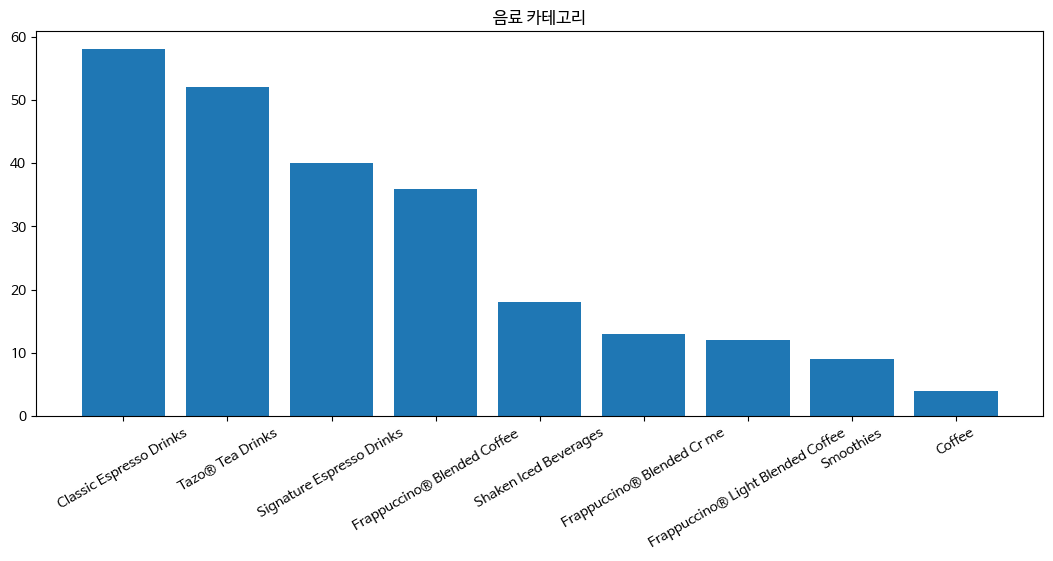

In [23]:
# 음료 카테고리 분포도 확인.
plt.figure(figsize=(13, 5))
plt.bar(x = df['Beverage_category'].value_counts().index, height=df['Beverage_category'].value_counts())

plt.title('음료 카테고리')
plt.xticks(rotation=30)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 232 (\N{LATIN SMALL LETTER E WITH GRAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


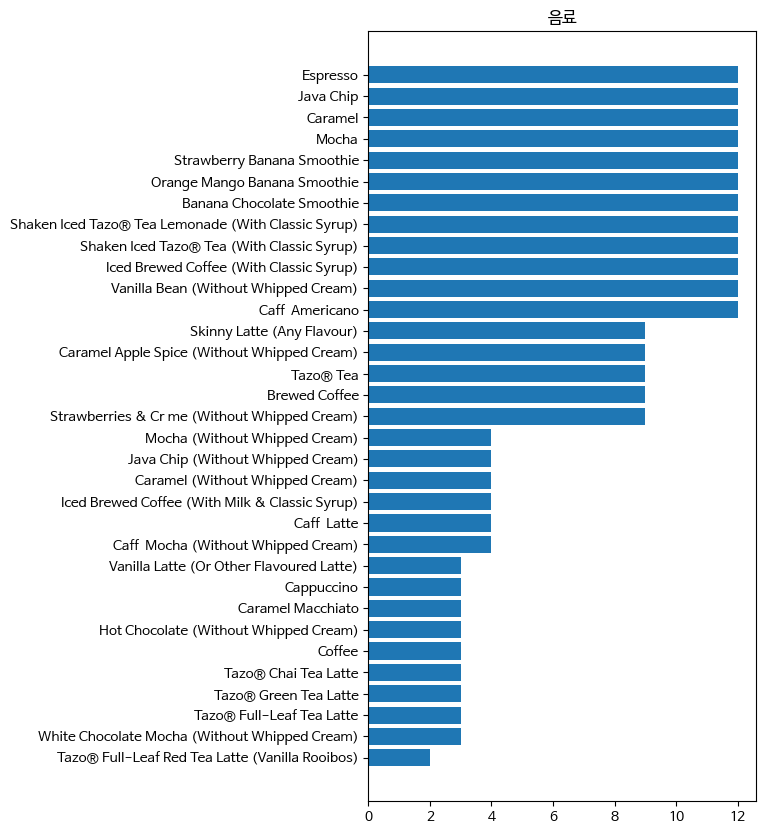

In [43]:
# 음료 분포도 확인.
plt.figure(figsize=(5, 10))
plt.barh(y=df['Beverage'].value_counts().index, width=df['Beverage'].value_counts(ascending=True))

plt.title('음료')
plt.show()

In [53]:
# 한끼 권장 칼로리 음료 (300 ~ 700칼로리)
meal_calories = df[(df['Calories'] > 300) & (df['Calories'] < 700)]
meal_calories.head(3)

,Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbohydrates,Cholesterol,Dietary_Fibre,Sugars,Protein,Vitamin_A,Vitamin_C,Calcium,Iron,Caffeine
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,11,6.0,0.2,30,180,53,2,43,17.0,20,2,45,30,180
38,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,320,9,4.5,0.3,35,200,46,0,44,15.0,25,2,45,0,150
78,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,310,9,6.0,0.1,20,200,46,0,44,11.0,15,2,35,0,75


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 232 (\N{LATIN SMALL LETTER E WITH GRAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


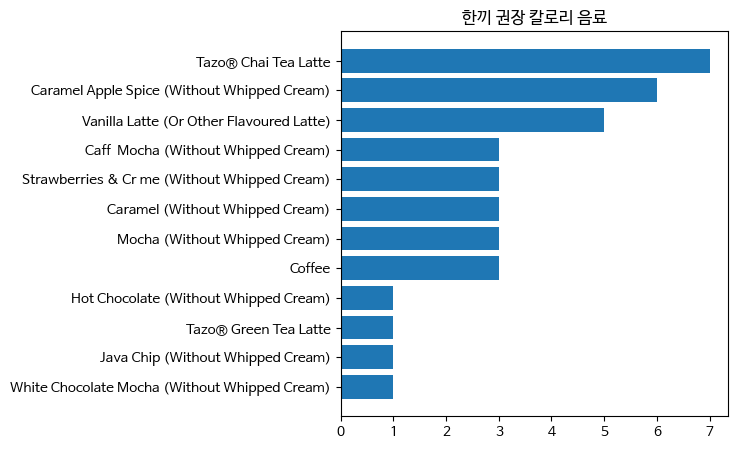

In [59]:
# 한끼 권장 칼로리 음료
plt.figure(figsize=(5, 5))
plt.barh(y=meal_calories['Beverage'].value_counts().index, width=meal_calories['Beverage'].value_counts(ascending=True))

plt.title('한끼 권장 칼로리 음료')
plt.show()